In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
data=pd.read_csv('salary.csv')
data.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,junior
1,1.3,46205,31,0,middle
2,1.5,37731,29,1,middle
3,2.0,43525,30,1,middle
4,2.2,39891,27,1,middle


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
YearsExperience    30 non-null float64
Salary             30 non-null int64
age                30 non-null int64
company_change     30 non-null int64
type               30 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 1.2+ KB


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0
age,30.0,34.266667,7.031620,21.0,29.00,34.0,37.75,56.0
company_change,30.0,0.400000,0.498273,0.0,0.00,0.0,1.00,1.0


In [5]:
data.isnull().sum()

YearsExperience    0
Salary             0
age                0
company_change     0
type               0
dtype: int64

In [6]:
data.corr()

,YearsExperience,Salary,age,company_change
YearsExperience,1.000000,0.978242,0.641433,-0.476989
Salary,0.978242,1.000000,0.656129,-0.552734
age,0.641433,0.656129,1.000000,-0.444854
company_change,-0.476989,-0.552734,-0.444854,1.000000


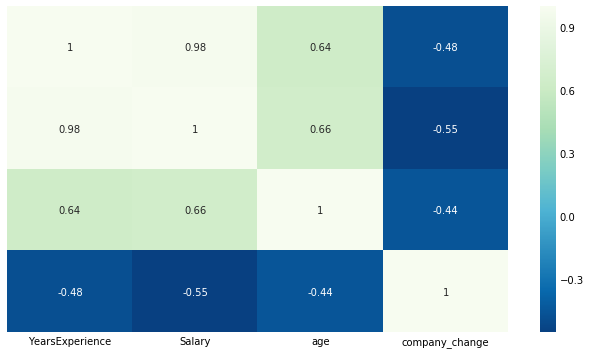

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),yticklabels=False,annot=True,cmap='GnBu_r')

In [8]:
class LabelEncoder:
    
    def fit_transform(self,data):
        duplicate_list=list(data)
        unique=list(set(data))
        l=len(unique)
        numbers=list(range(0,l))
        for i in range(len(data)):
            ind=unique.index(duplicate_list[i])
            duplicate_list[i]=numbers[ind]
        data=pd.DataFrame(duplicate_list)
        return data

In [9]:
encoder=LabelEncoder()
data['type']=encoder.fit_transform(data['type'])

In [10]:
data.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,3
1,1.3,46205,31,0,0
2,1.5,37731,29,1,0
3,2.0,43525,30,1,0
4,2.2,39891,27,1,0


In [11]:
data['type'].unique()

array([3, 0, 2, 1], dtype=int64)

In [27]:
def train_test_split(x,y,test_size):
    shuffle_index_whole=np.random.permutation(len(x))
    x,y=x[shuffle_index_whole],y[shuffle_index_whole]
    x_length=len(x)
    training_set=int(x_length*(1-test_size))
    x_train,x_test,y_train,y_test=x[:training_set],x[training_set:],y[:training_set],y[training_set:]
    return (np.array(x_train),np.array(x_test),np.array(y_train),np.array(y_test))

In [28]:
x=np.array(data.drop(['YearsExperience'],axis=1))
y=np.array(data['YearsExperience'])

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,0.3)

In [30]:
len(x_train)

21

In [31]:
len(x_test)

9

In [32]:
y_train

array([ 6.8,  3.9,  3.2,  1.3,  4.5,  3.7,  9.6,  7.1,  4. ,  9.5,  5.3,
       10.5,  5.9,  8.7, 10.3,  2.9,  2.2,  4.9,  3. ,  9. ,  1.1])

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model=LinearRegression()

In [35]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_pred=model.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import explained_variance_score

In [38]:
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(f"accuracy is {explained_variance_score(y_test,y_pred)*100}%")

0.3429638515438136
0.5856311565685467
0.49118775114891705
accuracy is 93.28226222880515%
